### anaconda 관리자 권한 실행으로 실행 후 conda install geopandas
### !pip install descartes

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import descartes
from shapely.geometry import Point, Polygon

%matplotlib inline

In [123]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

#Window 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 119안전센터

In [124]:
spot119 = pd.read_csv('spot119.csv')
spot119

,고유번호,센터ID,센터명,위도,경도
0,21,1121101,양천119안전센터,37.527161,126.869452
1,22,1122101,신내119안전센터,37.610246,127.096473
2,42,1115104,서초119안전센터,37.487773,127.017145
3,3,1106102,이촌119안전센터,37.527841,126.958318
4,4,1106104,후암119안전센터,37.544896,126.981242
5,5,1103104,신교119안전센터,37.580398,126.964577
6,6,1103108,종로119안전센터,37.579479,126.991009
7,7,1103102,세종로119안전센터,37.581958,126.976747
8,8,1103105,연건119안전센터,37.580569,126.998178
9,9,1104401,무학119안전센터,37.562532,127.016124


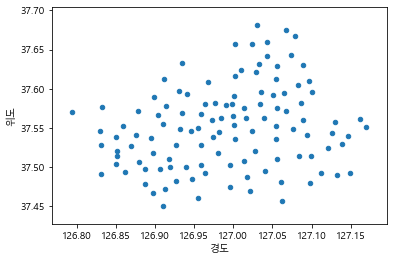

In [125]:
#Pandas로 scatter plot 그리기
# plt.figure(figsize=(10, 7))
spot119.plot.scatter(x='경도', y='위도')

# geopandas

In [126]:
import geopandas as gpd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 13
plt.rcParams["figure.figsize"] = (10,10)

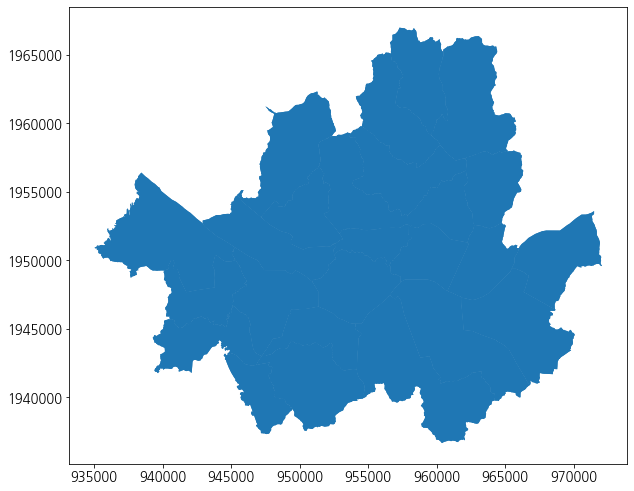

In [152]:
korea_map = gpd.read_file('TL_SCCO_SIG.shp', encoding='cp949')
fig, ax = plt.subplots(figsize=(10,10))
seoul_map = korea_map.loc[0:24]
seoul_map.plot(ax=ax)

geo_df = gpd.GeoDataFrame(seoul_map, crs = {'init':'epsg:4326'})
geo_df.plot(ax=ax)

In [128]:
#ax = seoul.convex_hull.plot(color='orange', edgecolor="white")
#ax.set_title("서울특별시 자치구")
#ax.set_axis_off()
#plt.show()

In [129]:
#convex_hull.plot?

In [130]:
location = pd.read_csv('spot119.csv')
crs = {'init':'epsg:4326'}
location

,고유번호,센터ID,센터명,위도,경도
0,21,1121101,양천119안전센터,37.527161,126.869452
1,22,1122101,신내119안전센터,37.610246,127.096473
2,42,1115104,서초119안전센터,37.487773,127.017145
3,3,1106102,이촌119안전센터,37.527841,126.958318
4,4,1106104,후암119안전센터,37.544896,126.981242
5,5,1103104,신교119안전센터,37.580398,126.964577
6,6,1103108,종로119안전센터,37.579479,126.991009
7,7,1103102,세종로119안전센터,37.581958,126.976747
8,8,1103105,연건119안전센터,37.580569,126.998178
9,9,1104401,무학119안전센터,37.562532,127.016124


In [134]:
geometry = [Point(xy) for xy in zip(location['경도'], location['위도'])]
geometry[:3]

In [135]:
geo_df = gpd.GeoDataFrame(location, crs = crs, geometry = geometry)
geo_df.head()

,고유번호,센터ID,센터명,위도,경도,geometry
0,21,1121101,양천119안전센터,37.527161,126.869452,POINT (126.86945 37.52716)
1,22,1122101,신내119안전센터,37.610246,127.096473,POINT (127.09647 37.61025)
2,42,1115104,서초119안전센터,37.487773,127.017145,POINT (127.01714 37.48777)
3,3,1106102,이촌119안전센터,37.527841,126.958318,POINT (126.95832 37.52784)
4,4,1106104,후암119안전센터,37.544896,126.981242,POINT (126.98124 37.54490)


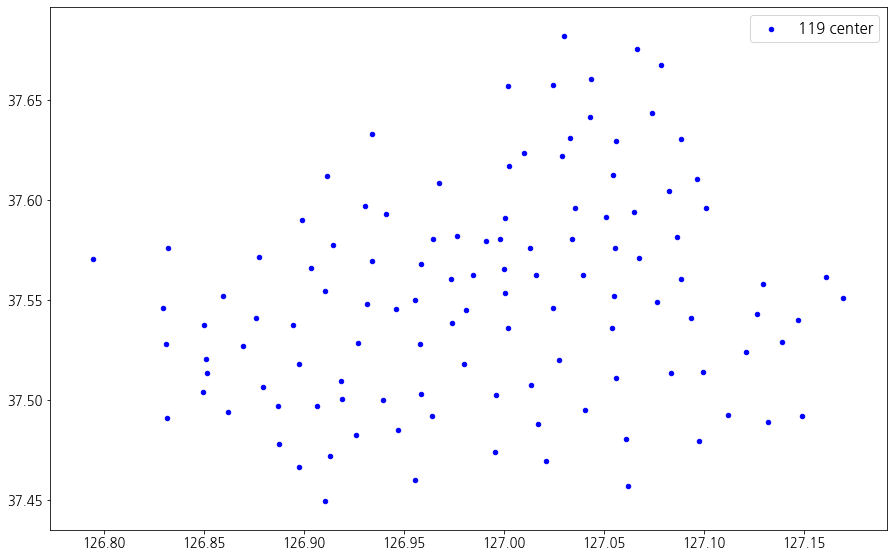

In [139]:
fig,ax = plt.subplots(figsize = (15,15))
# seoul_map.plot(ax=ax, alpha = 0.4, color="gray") 
geo_df.plot(ax=ax, markersize=20, color="blue", marker="o", label="119 center")
plt.legend(prop={'size':15})